# Initial Conditions Optimization
## Plot History

In [25]:
%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import ray
import io
import os
from IPython.display import display, HTML, Markdown

## Load PlayFair Display and Roboto Fonts from Google

In [26]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=28)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=20)


## Load Humor Sans Font

In [27]:
github_url = 'http://antiyawn.com/uploads/Humor-Sans-1.0.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
comic_font = fm.FontProperties(fname=f.name, size=18)

# Main code

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

## Load Initial Parameters

In [29]:
dfparam = pd.read_csv("data/param.csv")
display(dfparam)


DRS  start-date  prediction-range         s0  \
0        DRS 01 - Grande São Paulo  2020-03-20               200  2000000.0   
1               DRS 02 - Araçatuba  2020-04-01               150      500.0   
2              DRS 03 - Araraquara  2020-04-01               150     2000.0   
3        DRS 04 - Baixada Santista  2020-04-01               150     8000.0   
4                DRS 05 - Barretos  2020-04-01               150     2000.0   
5                   DRS 06 - Bauru  2020-04-01               150    10000.0   
6                DRS 07 - Campinas  2020-04-01               150    20000.0   
7                  DRS 08 - Franca  2020-04-01               150     1000.0   
8                 DRS 09 - Marília  2020-04-01               150     5000.0   
9              DRS 10 - Piracicaba  2020-04-01               150    10000.0   
10    DRS 11 - Presidente Prudente  2020-04-01               150     1000.0   
11               DRS 12 - Registro  2020-04-01               150     1000.0   
12         DRS 13 - Ribeirão Preto  2020-04-01               150     5000.0   
13  DRS 14 - São João da Boa Vista  2020-04-01               150     2000.0   
14  DRS 15 - São José do Rio Preto  2020-04-01               150    10000.0   
15               DRS 16 - Sorocaba  2020-04-01               150     1200.0   
16                DRS 17 - Taubaté  2020-04-01               150    10000.0   

        e0      a0        i0        r0        d0  START  RATIO  WCASES  WREC  
0   0.0001  0.0001  800.0000  300.0000  400.0000      0   0.15    0.15  0.05  
1   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
2   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
3   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
4   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
5   0.0001  0.0001    4.0000    0.0001    0.0001      0   0.10    0.40  0.10  
6   0.0001  0.0001   40.0000    0.0001    0.0001      0   0.10    0.40  0.10  
7   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
8   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
9   0.0001  0.0001    0.0001    0.0001    1.0000      0   0.10    0.40  0.10  
10  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
11  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
12  0.0001  0.0001    0.0001    0.0001    0.0001      5   0.10    0.40  0.10  
13  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
14  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
15  0.0001  0.0001    2.0000    0.0001    0.0001      0   0.10    0.40  0.10  
16  0.0001  0.0001   17.0000    0.0001    2.0000      0   0.10    0.40  0.10

## Select data set

In [30]:
opt=0

#select history file version, model and states
if opt==0:
    version=105
    model="Yabox"
    DRS=dfparam.DRS
    

In [31]:
strFile="results/IC_optimizeddistrictRegions"+str(version)+".csv"
if os.path.isfile(strFile):
    os.remove(strFile)

## Plot and Save Results

# Results for DRS 01 - Grande São Paulo District Region

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
0  1.652254e+12 2020-03-21            0  2038281  1537  130  0.3288  0.0587

## 5 Lowest Results DRS 01 - Grande São Paulo District Region

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
0  1.652254e+12 2020-03-21            0  2038281  1537  130  0.3288  0.0587

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


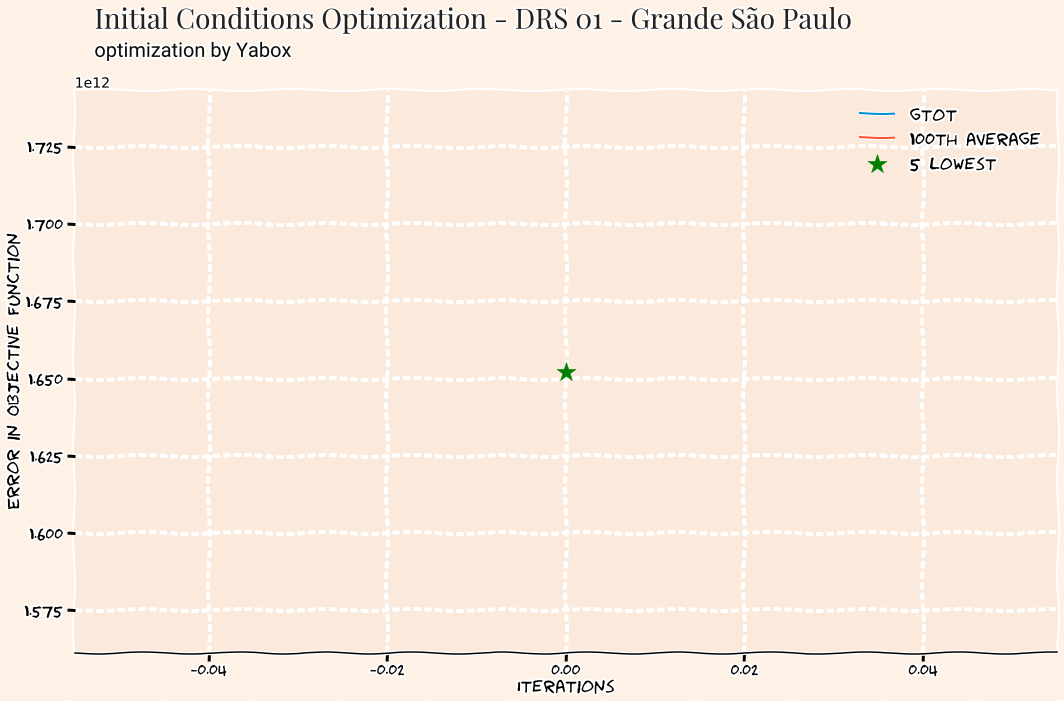

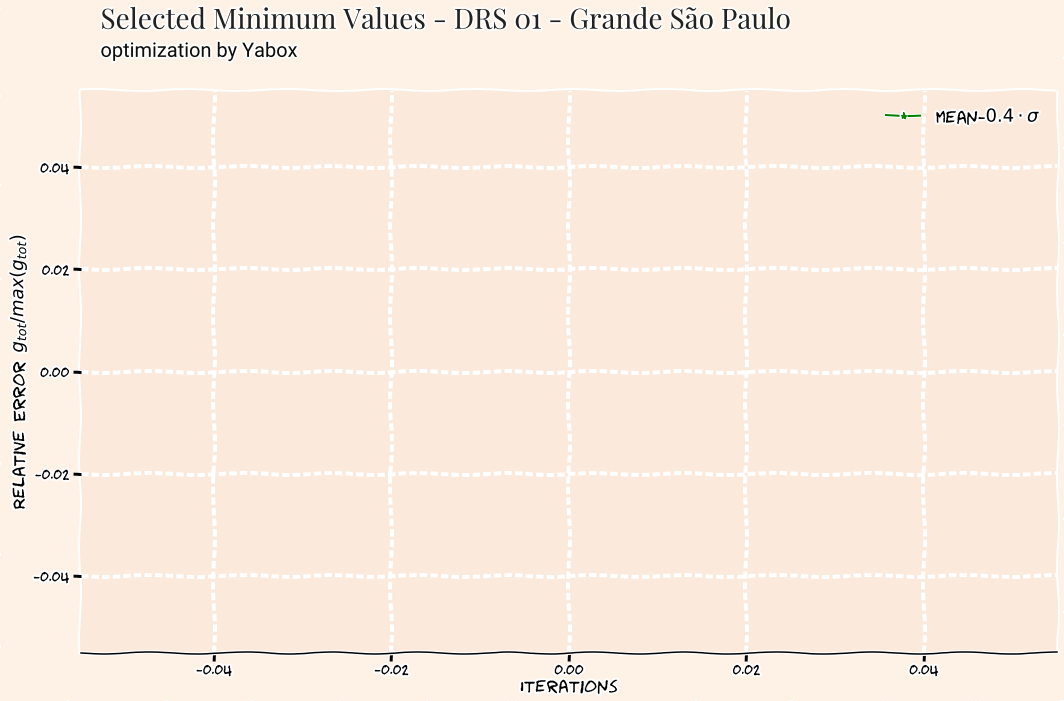

# Results for DRS 02 - Araçatuba District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
0  1.118206e+06 2020-04-02            0  561   0   0  0.6556  0.0725

## 5 Lowest Results DRS 02 - Araçatuba District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
0  1.118206e+06 2020-04-02            0  561   0   0  0.6556  0.0725
1  1.673332e+06 2020-04-01            0  568   0   0  0.7606  0.0781

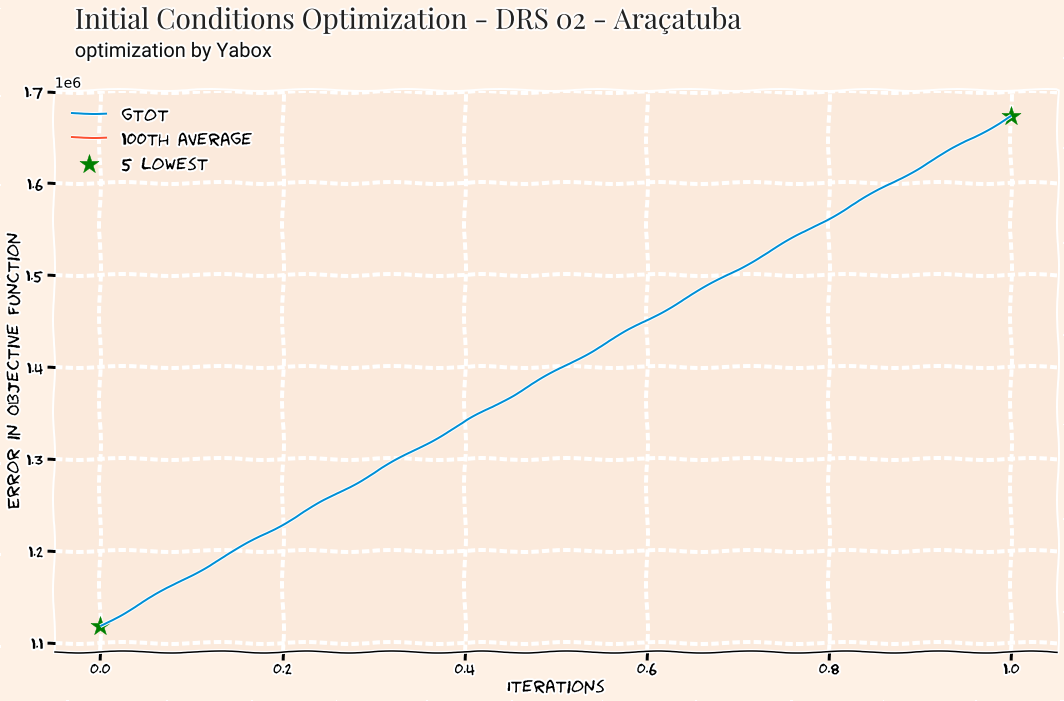

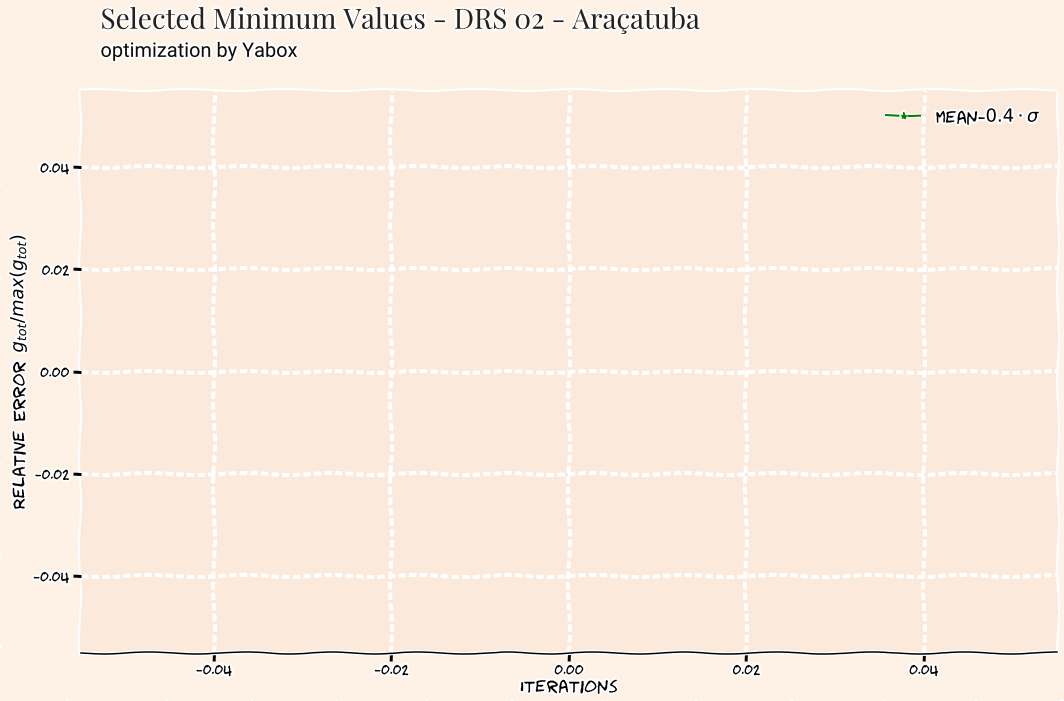

# Results for DRS 03 - Araraquara District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  2.042649e+06 2020-03-30            0  1706   0   0  0.6385  0.0469

## 5 Lowest Results DRS 03 - Araraquara District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  2.042649e+06 2020-03-30            0  1706   0   0  0.6385  0.0469
1  8.260302e+06 2020-04-01            0  2707   0   0  0.4065  0.0292

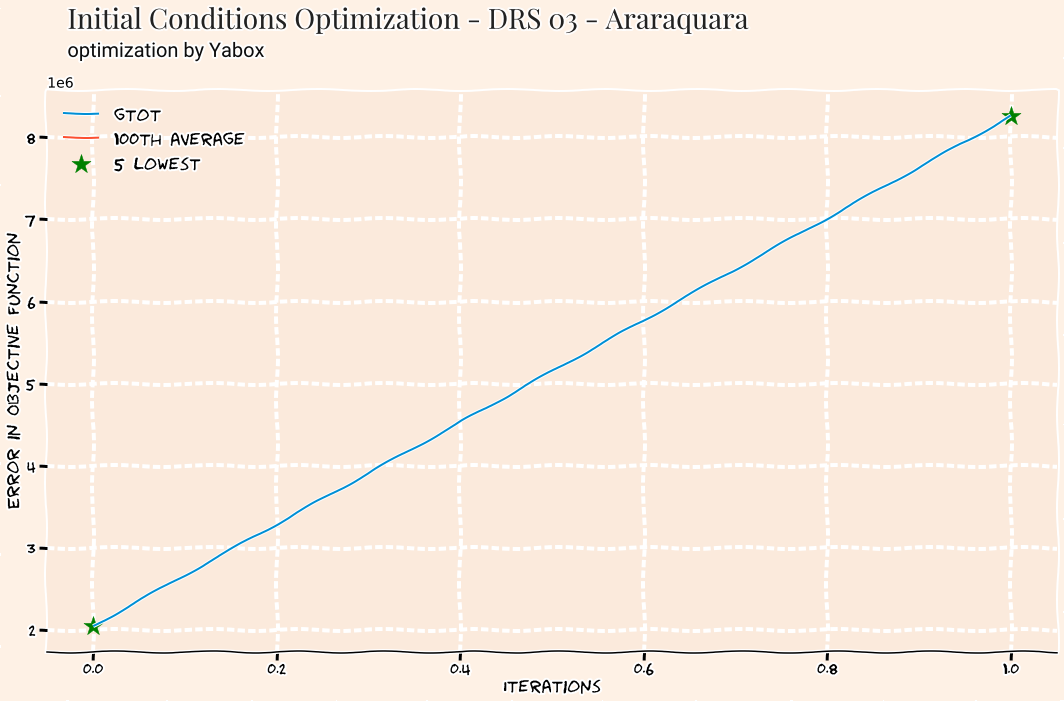

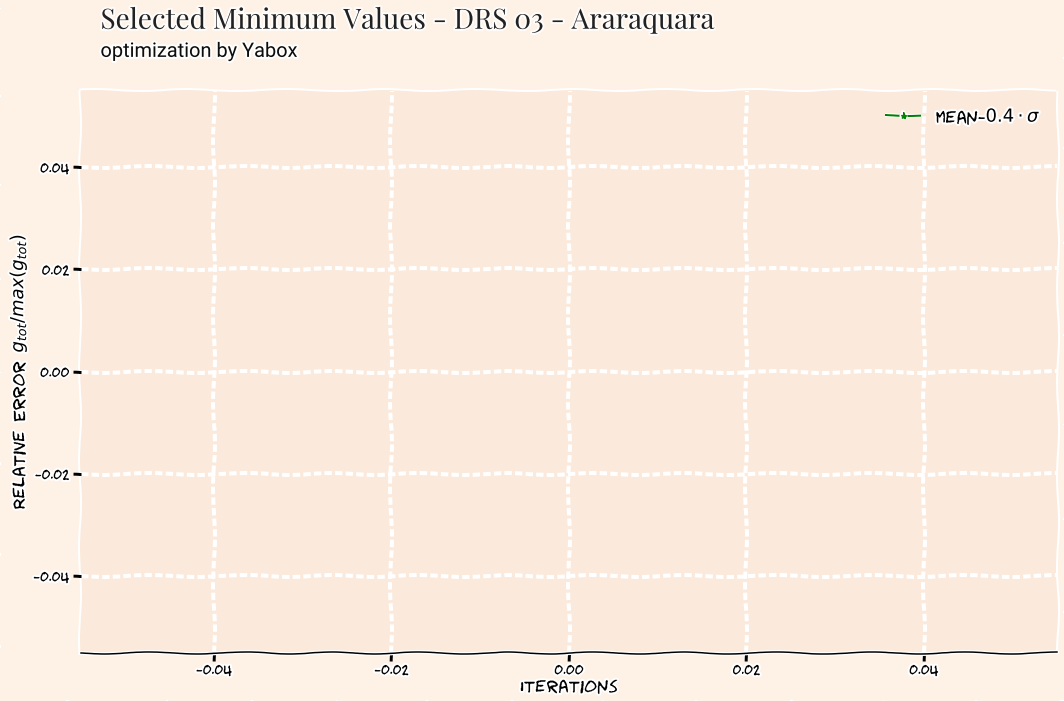

# Results for DRS 04 - Baixada Santista District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  5.584040e+07 2020-03-31            0  10688   0   0  0.3648  0.0209

## 5 Lowest Results DRS 04 - Baixada Santista District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  5.584040e+07 2020-03-31            0  10688   0   0  0.3648  0.0209
0  6.983717e+07 2020-04-01            0  10620   0   0  0.4544  0.0622

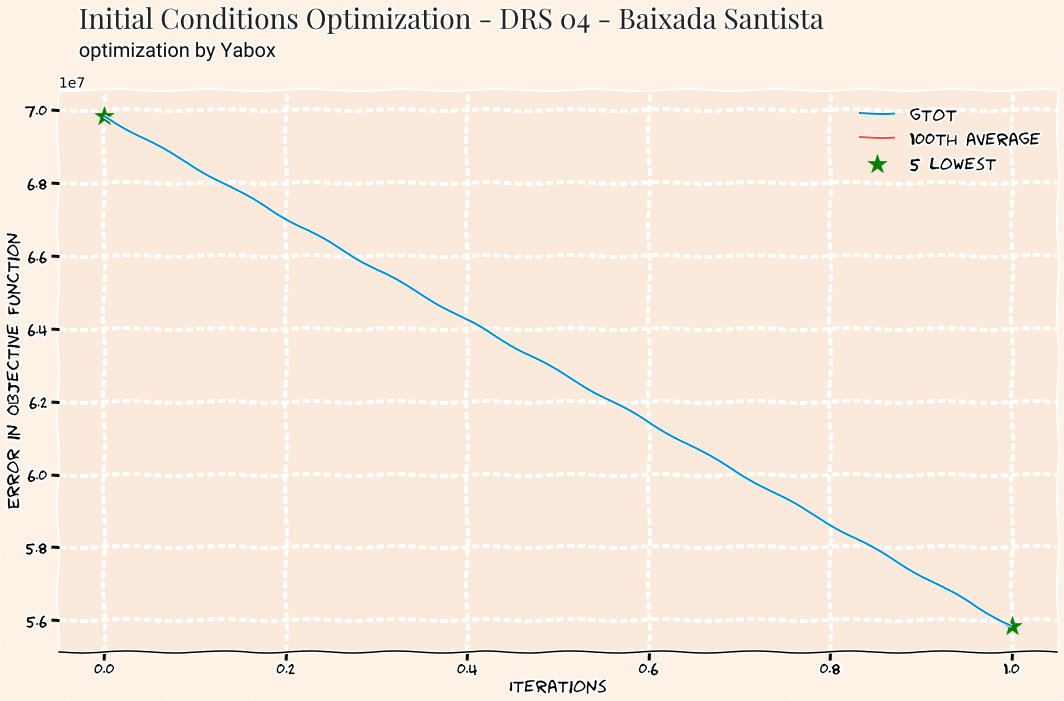

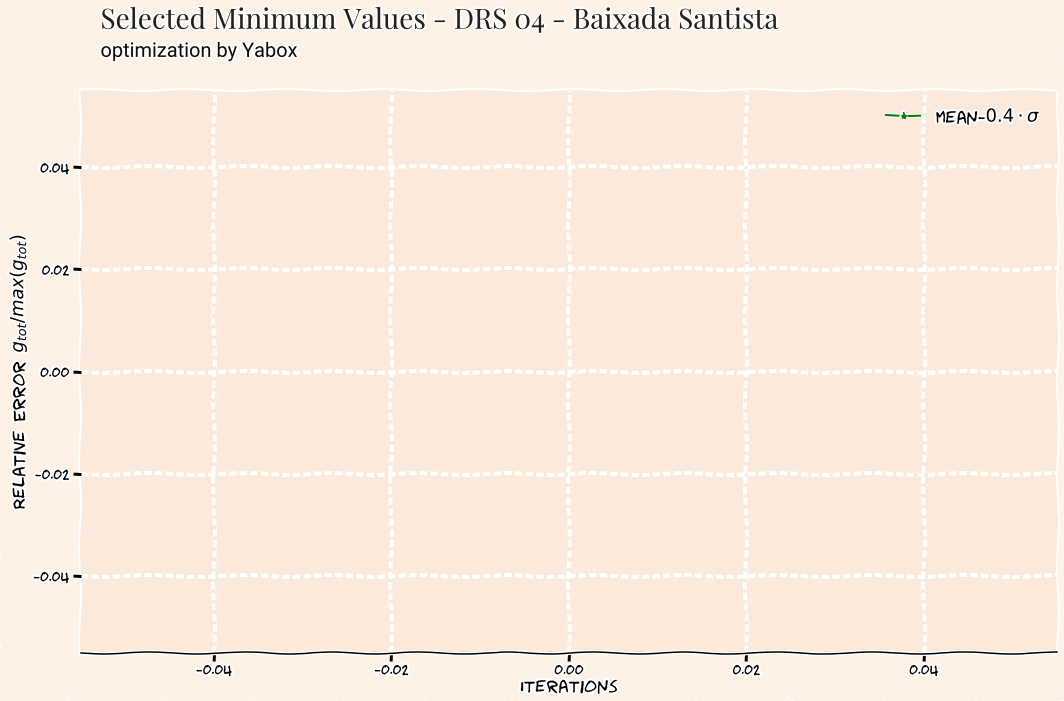

# Results for DRS 05 - Barretos District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1  379943.254348 2020-04-02            0  2849   0   0  0.4048  0.0513

## 5 Lowest Results DRS 05 - Barretos District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1  3.799433e+05 2020-04-02            0  2849   0   0  0.4048  0.0513
0  7.875064e+05 2020-03-31            0  1679   0   0  0.7133  0.0642
2  8.549575e+06 2020-04-02            0  2928   0   0  0.6304  0.0735

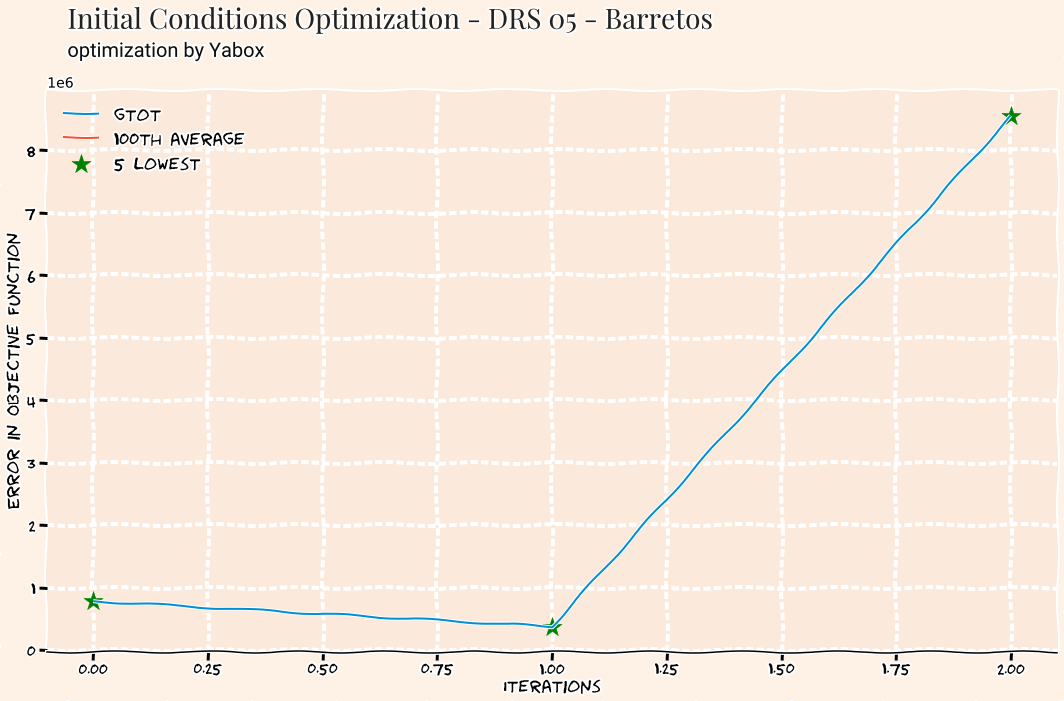

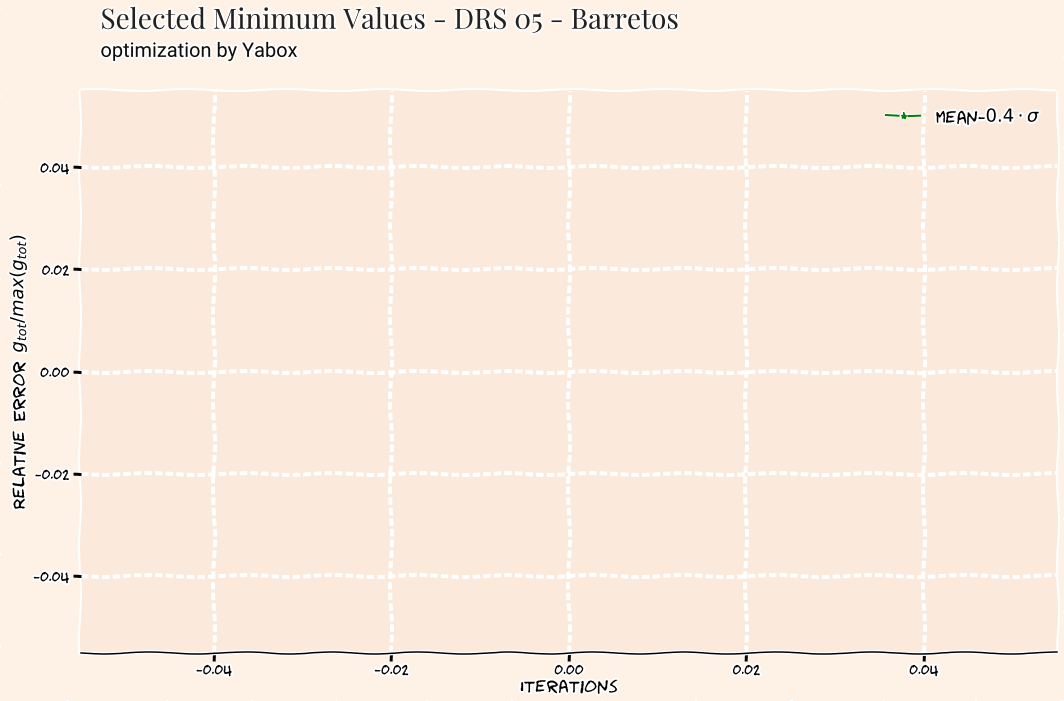

# Results for DRS 06 - Bauru District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  1.336987e+08 2020-03-30            0  10620   3   0  0.7104  0.0654

## 5 Lowest Results DRS 06 - Bauru District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  1.336987e+08 2020-03-30            0  10620   3   0  0.7104  0.0654
0  2.162494e+08 2020-03-31            0  13201   5   0  0.5784  0.0331

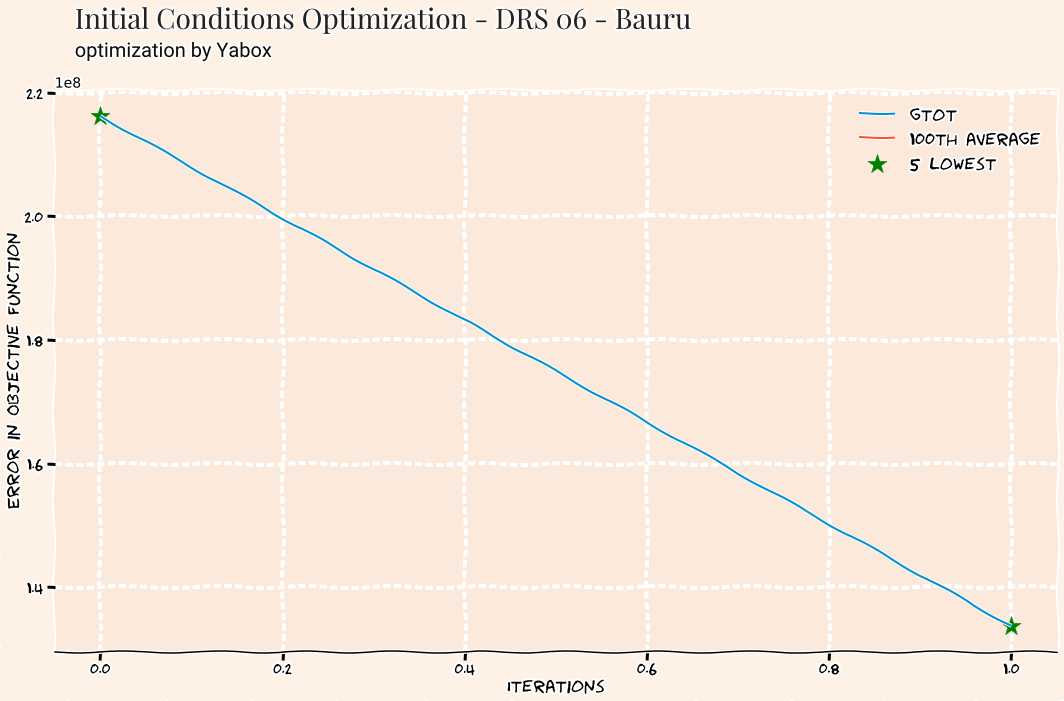

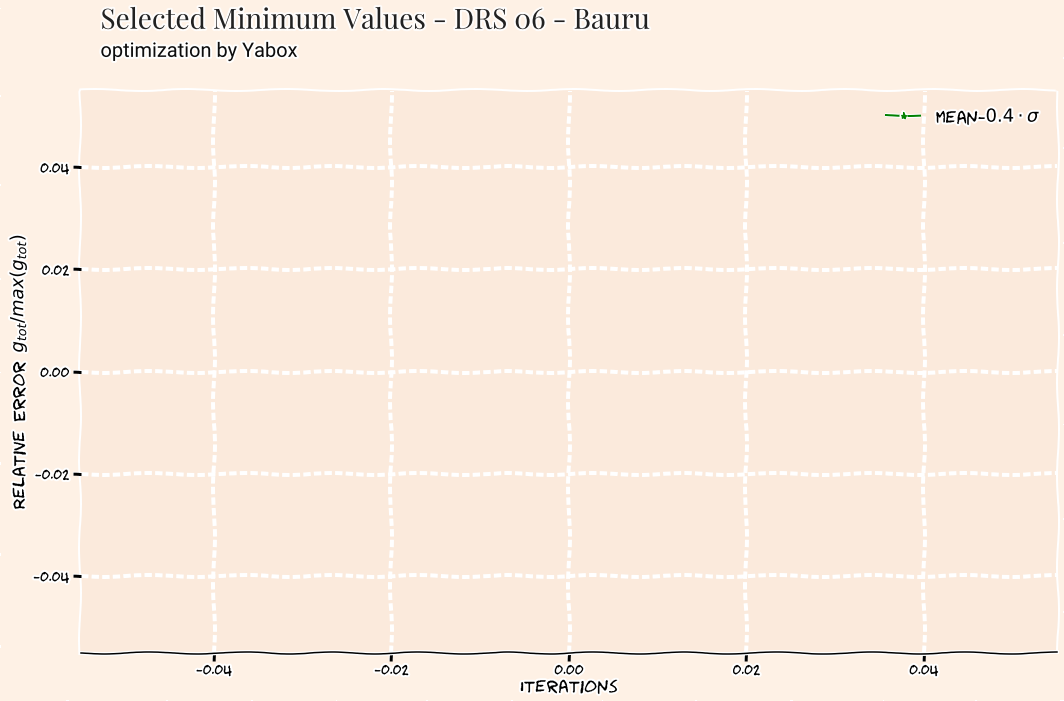

# Results for DRS 07 - Campinas District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
0  3.107321e+08 2020-03-30            0  17875  40   0  0.4898  0.0372

## 5 Lowest Results DRS 07 - Campinas District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
0  3.107321e+08 2020-03-30            0  17875  40   0  0.4898  0.0372
1  4.077830e+08 2020-04-01            0  22808  36   0  0.5603  0.0470

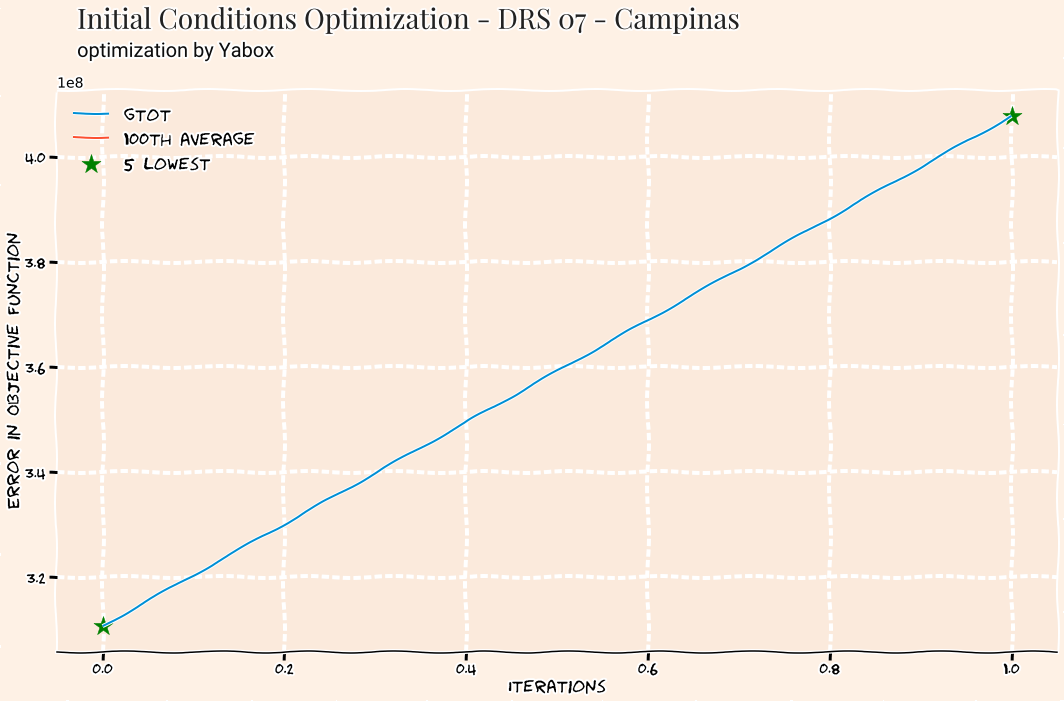

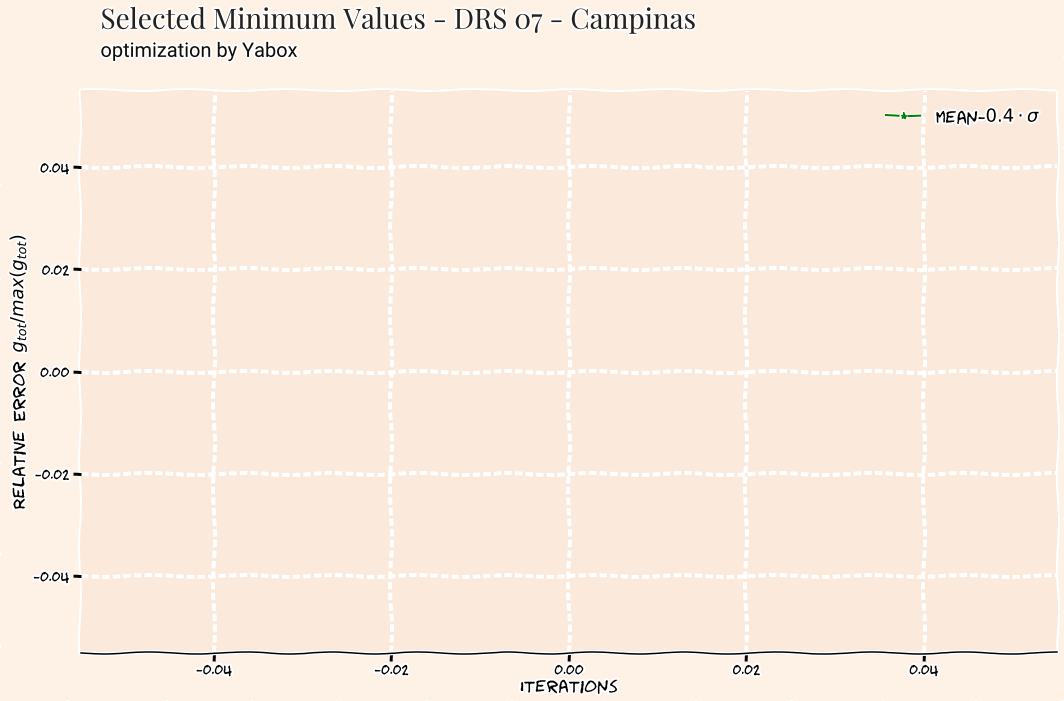

# Results for DRS 08 - Franca District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
0  566493.030066 2020-04-01            0  900   0   0  0.4555  0.0441

## 5 Lowest Results DRS 08 - Franca District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  5.664930e+05 2020-04-01            0   900   0   0  0.4555  0.0441
1  1.632637e+06 2020-03-30            0  1344   0   0  0.3754  0.0518

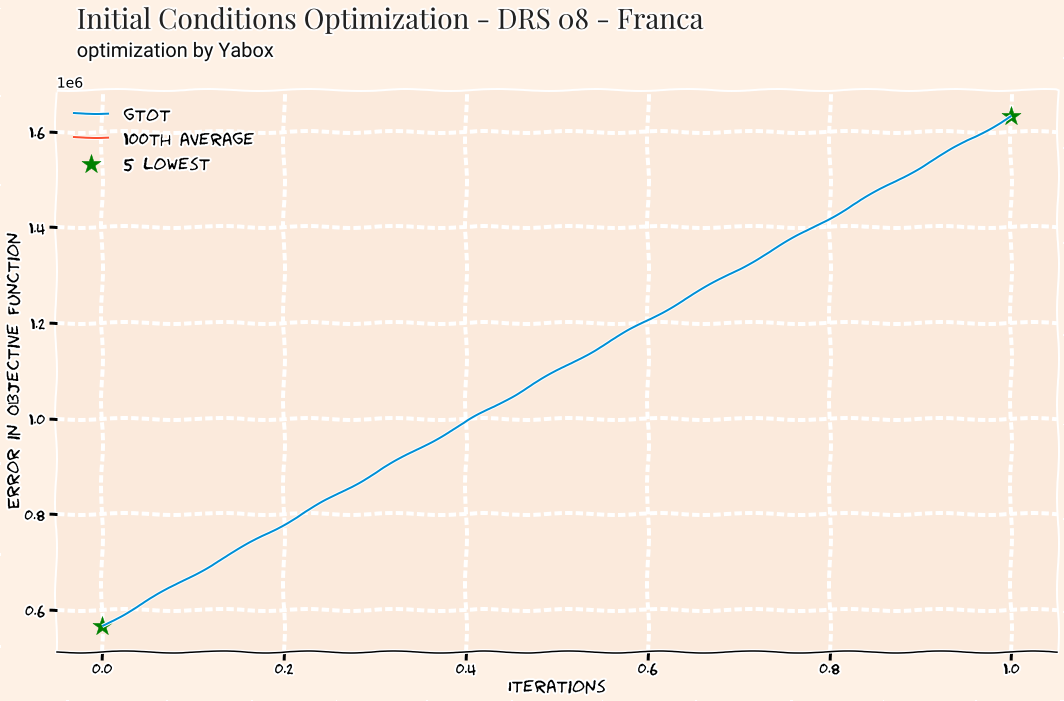

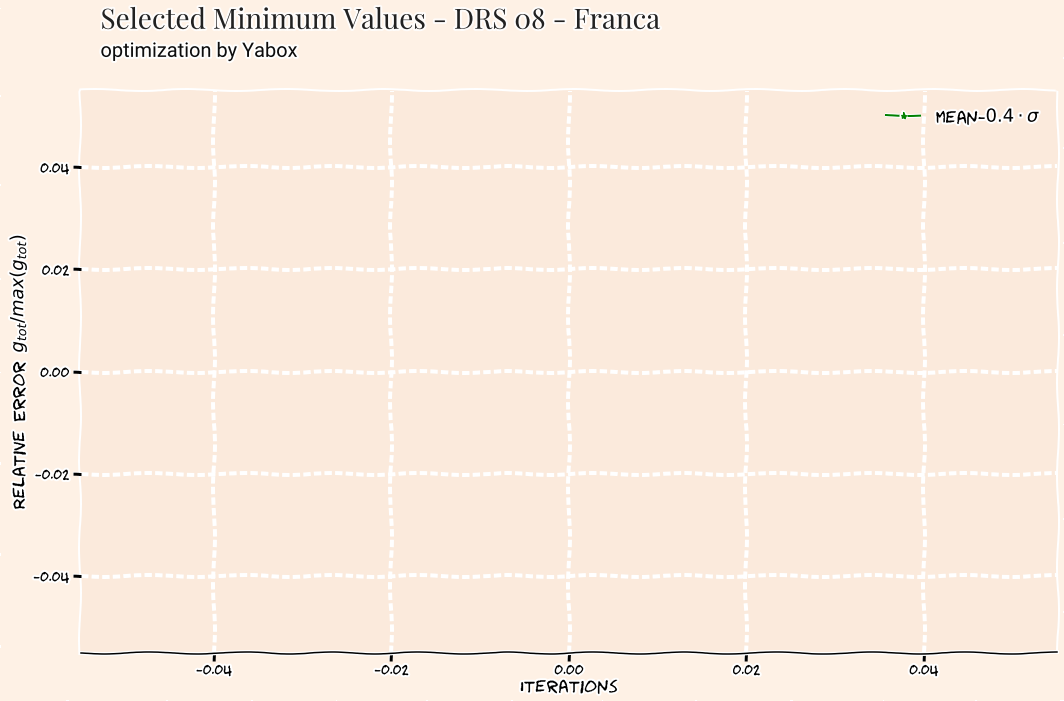

# Results for DRS 09 - Marília District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  1.935837e+07 2020-04-01            0  4006   0   0  0.7369  0.0472

## 5 Lowest Results DRS 09 - Marília District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  1.935837e+07 2020-04-01            0  4006   0   0  0.7369  0.0472
1  2.343449e+07 2020-04-01            0  4853   0   0  0.4046  0.0766

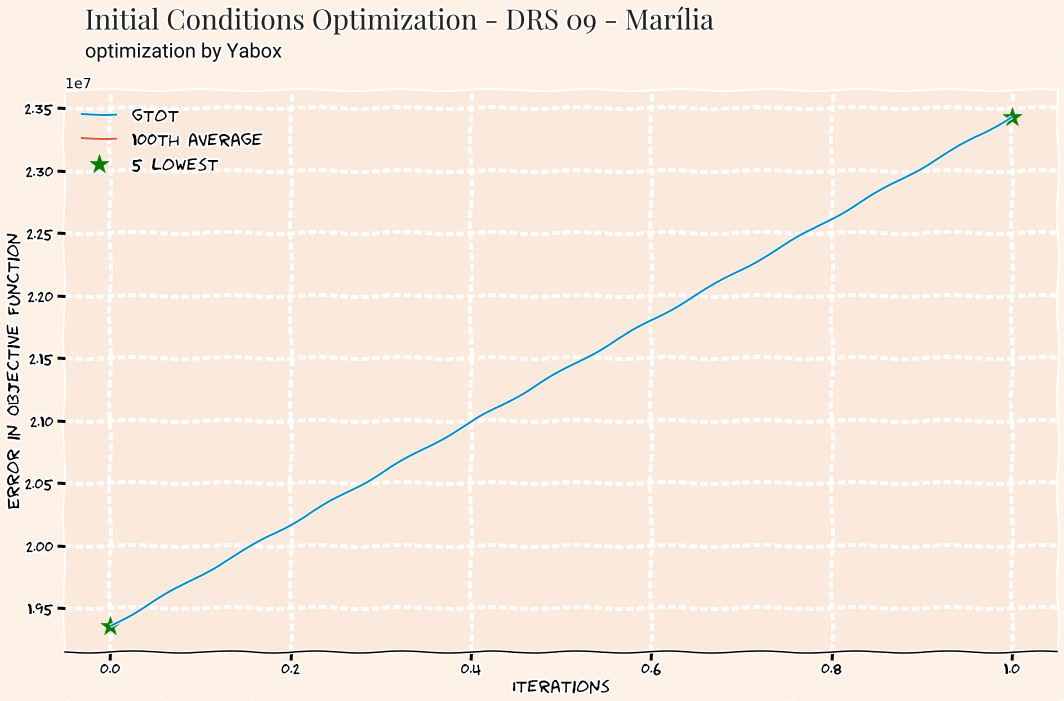

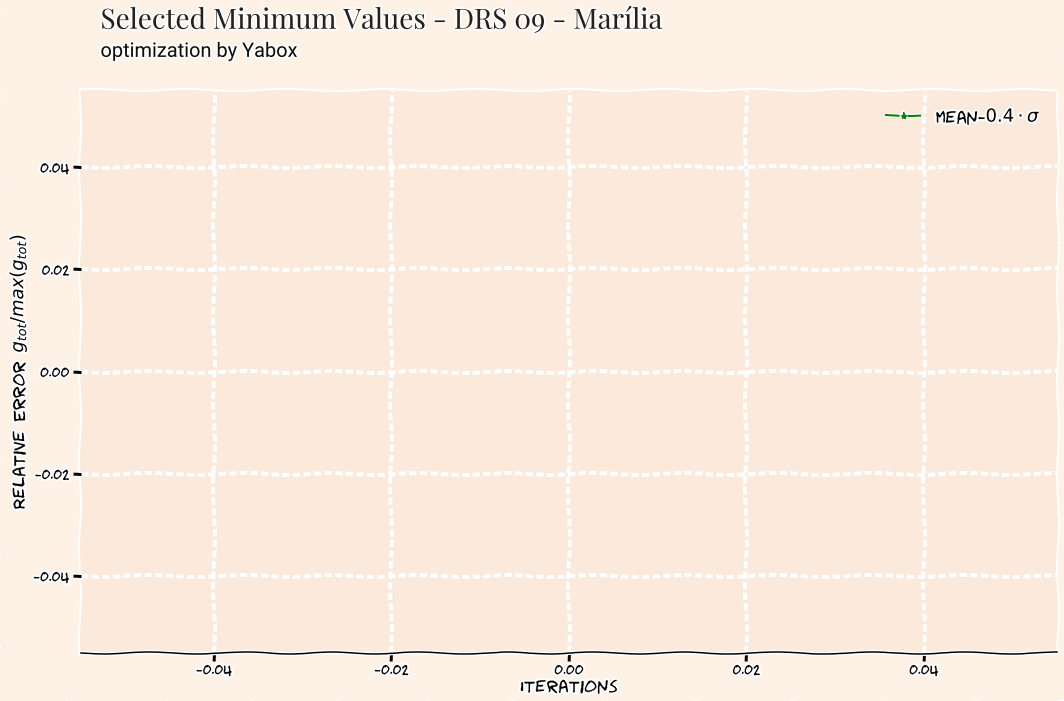

# Results for DRS 10 - Piracicaba District Region

gtot  startdate  startNcases     s0  i0  d0  wcases   wrec
1  6.479738e+06 2020-03-31            0  10170   0   0  0.3985  0.057

## 5 Lowest Results DRS 10 - Piracicaba District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  6.479738e+06 2020-03-31            0  10170   0   0  0.3985  0.0570
0  7.629666e+07 2020-04-01            0   9168   0   0  0.4358  0.0771

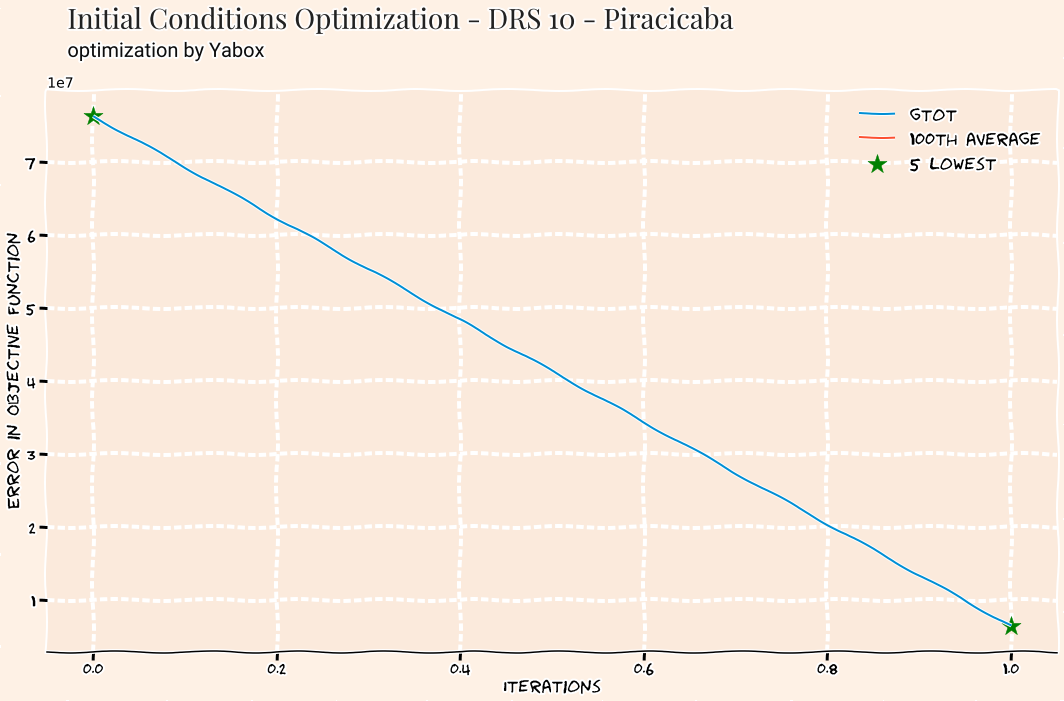

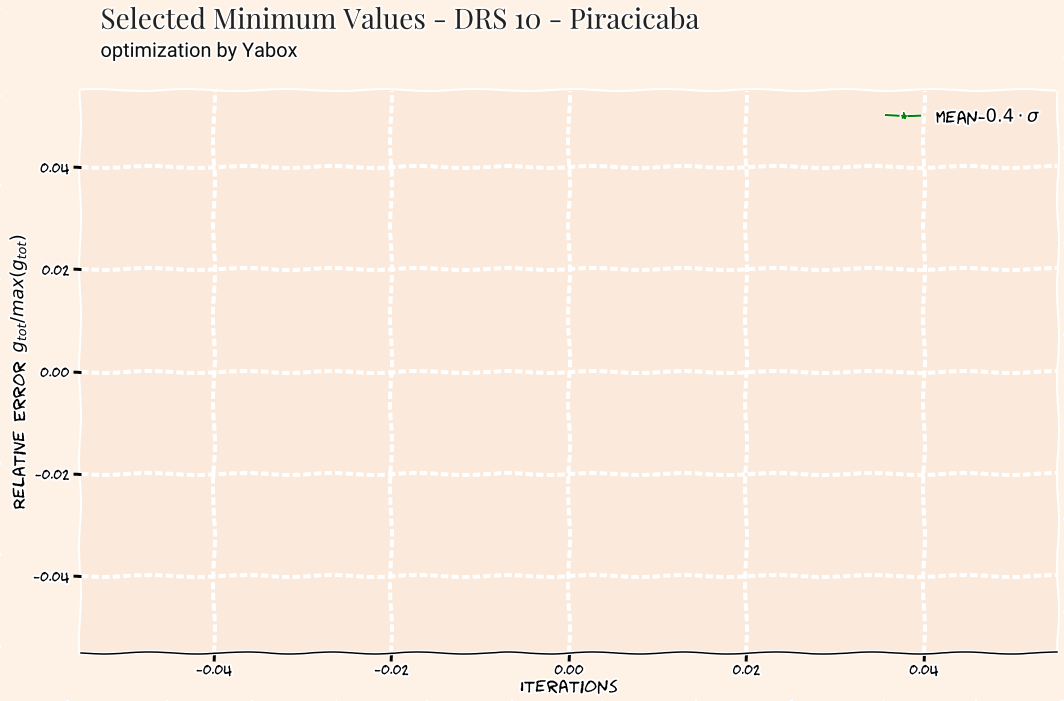

# Results for DRS 11 - Presidente Prudente District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
0  591460.319936 2020-04-01            0  939   0   0  0.3094  0.0258

## 5 Lowest Results DRS 11 - Presidente Prudente District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  591460.319936 2020-04-01            0   939   0   0  0.3094  0.0258
1  680088.667199 2020-03-31            0  1087   0   0  0.5287  0.0785

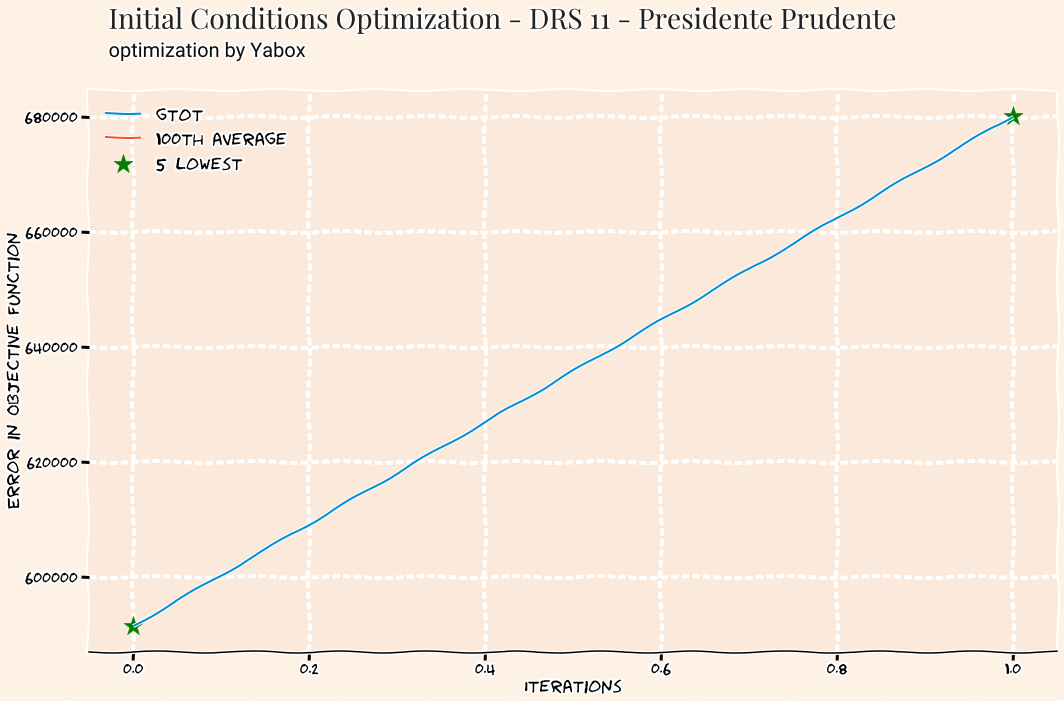

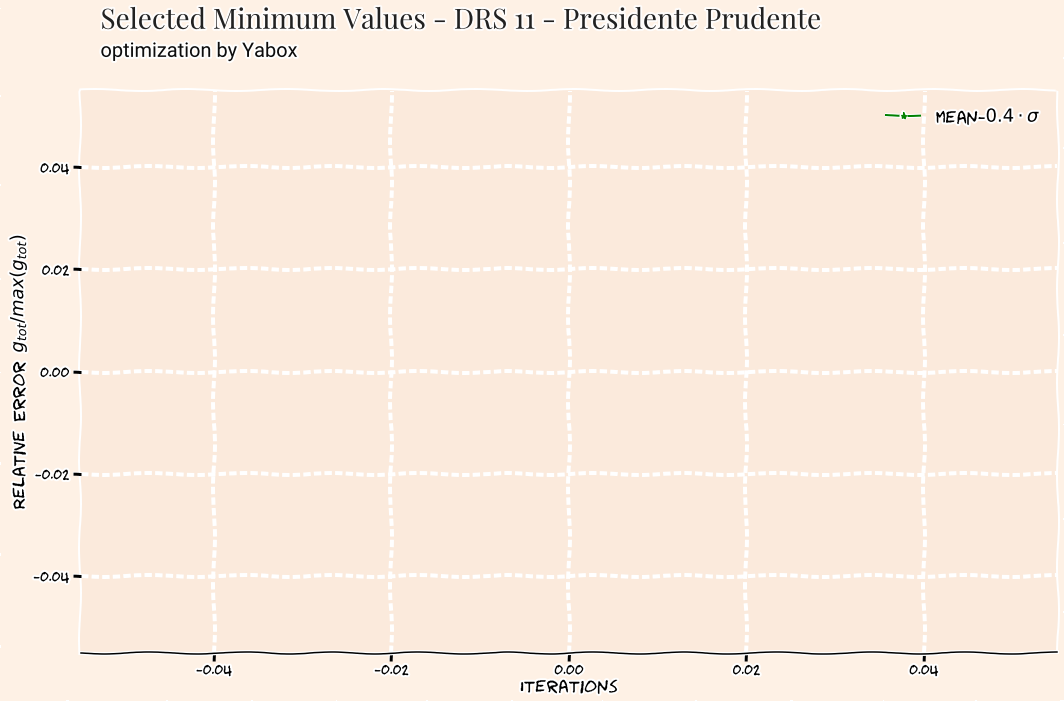

# Results for DRS 12 - Registro District Region

gtot  startdate  startNcases    s0  i0  d0  wcases   wrec
2  240005.337918 2020-04-02            0  1442   0   0  0.4552  0.026

## 5 Lowest Results DRS 12 - Registro District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
2  2.400053e+05 2020-04-02            0  1442   0   0  0.4552  0.0260
1  3.928962e+05 2020-04-01            0  1085   0   0  0.6971  0.0558
0  1.743053e+06 2020-04-02            0  1393   0   0  0.3536  0.0219

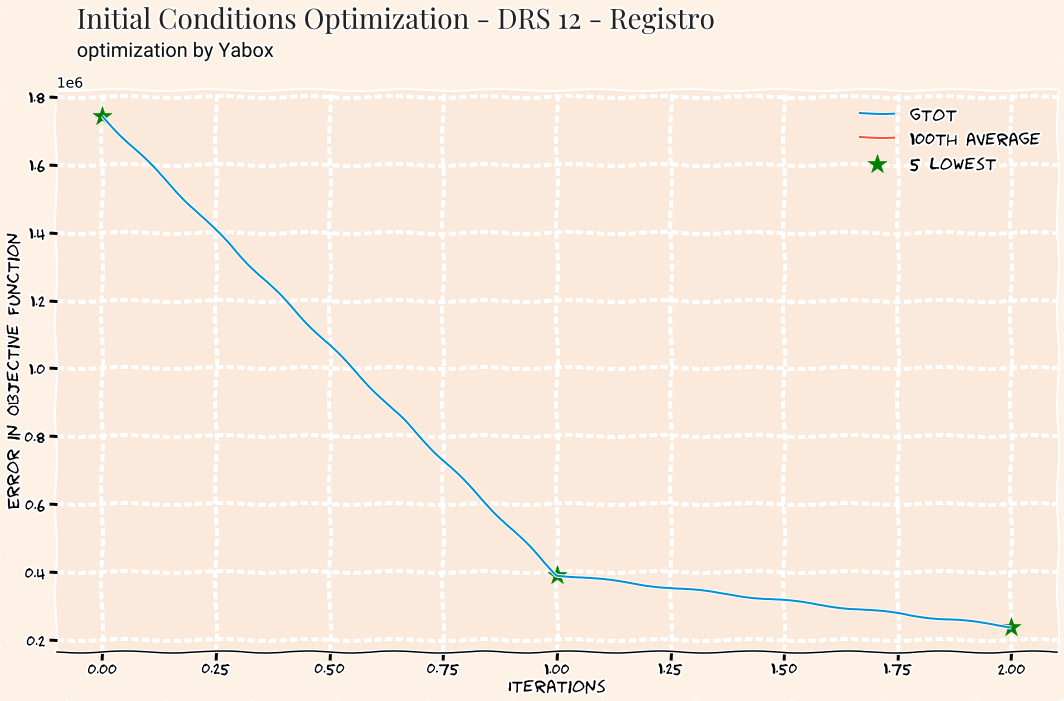

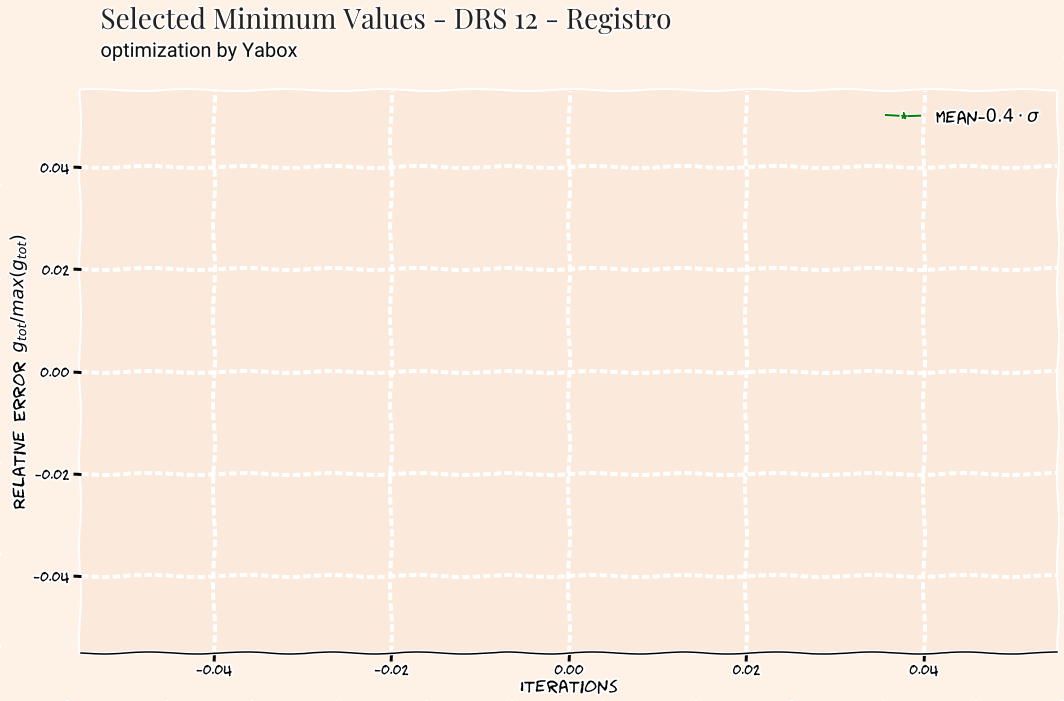

# Results for DRS 13 - Ribeirão Preto District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  3.388419e+07 2020-03-30            4  6253   0   0  0.7525  0.0227

## 5 Lowest Results DRS 13 - Ribeirão Preto District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
0  3.388419e+07 2020-03-30            4  6253   0   0  0.7525  0.0227

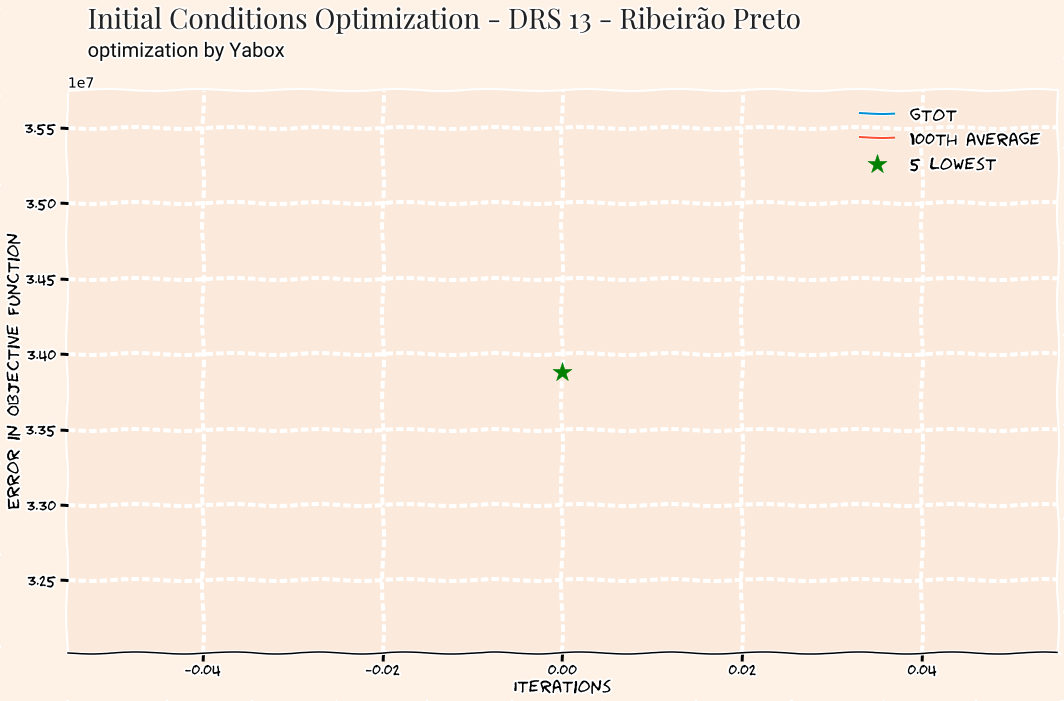

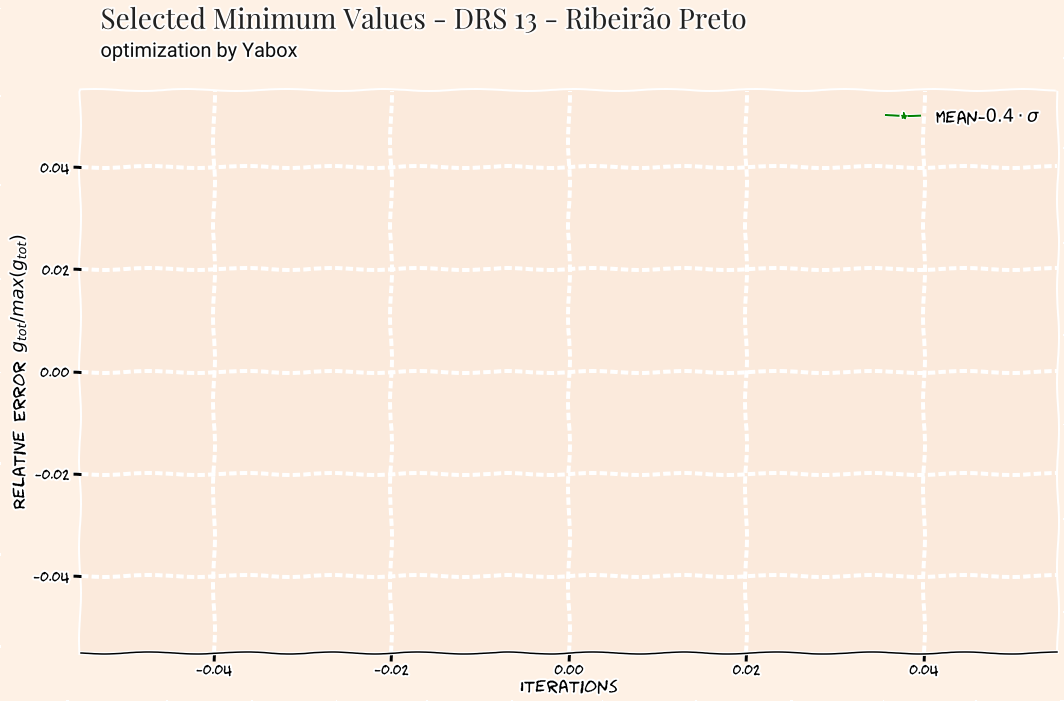

# Results for DRS 14 - São João da Boa Vista District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
2  697734.186582 2020-04-02            0  2443   0   0  0.6303  0.0607

## 5 Lowest Results DRS 14 - São João da Boa Vista District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
2  6.977342e+05 2020-04-02            0  2443   0   0  0.6303  0.0607
1  2.291889e+06 2020-04-01            0  1675   0   0  0.3965  0.0338
0  5.907172e+06 2020-04-01            0  2512   0   0  0.3767  0.0457

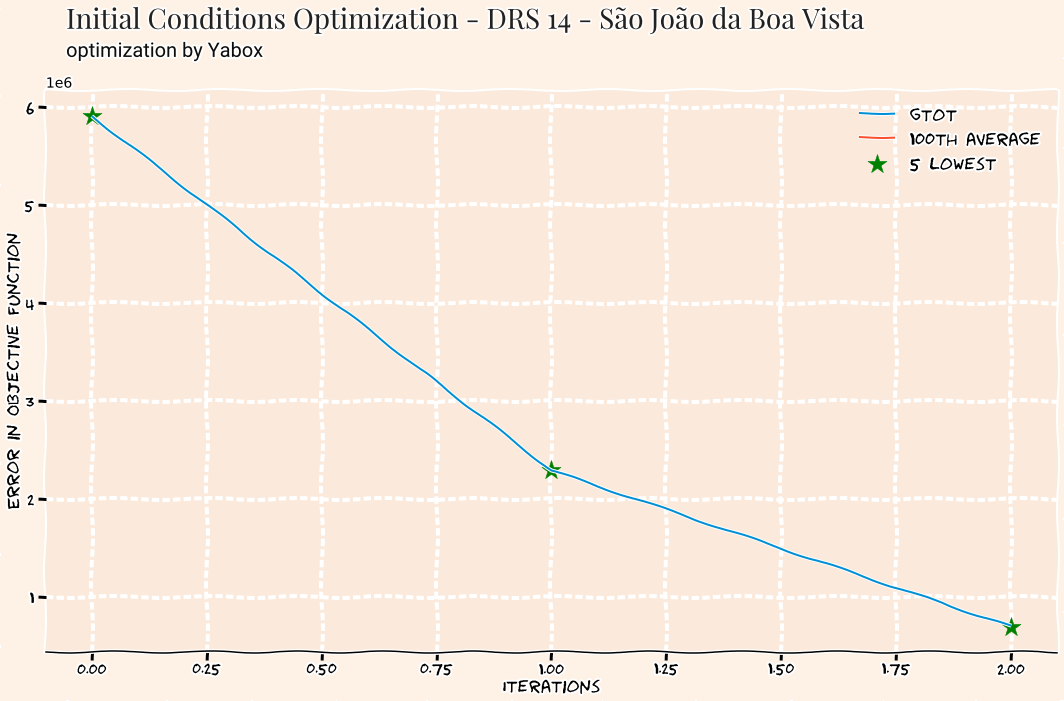

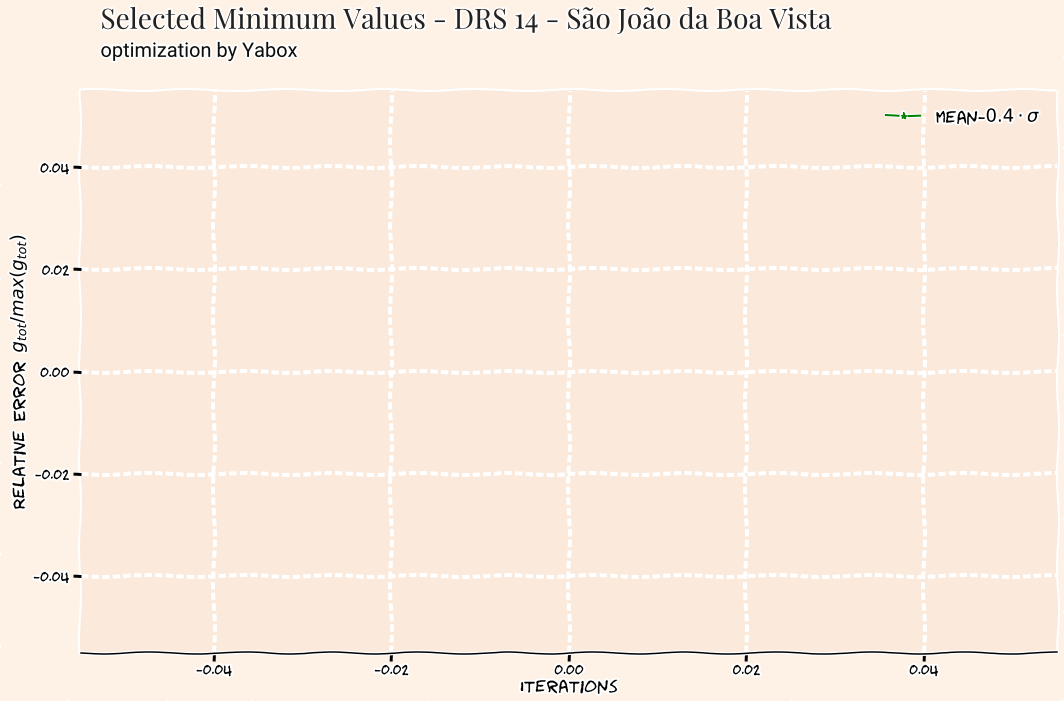

# Results for DRS 15 - São José do Rio Preto District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  9.421491e+06 2020-03-30            0  12276   0   0  0.4105  0.0251

## 5 Lowest Results DRS 15 - São José do Rio Preto District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  9.421491e+06 2020-03-30            0  12276   0   0  0.4105  0.0251
0  2.473683e+08 2020-03-30            0  14362   0   0  0.7036  0.0372

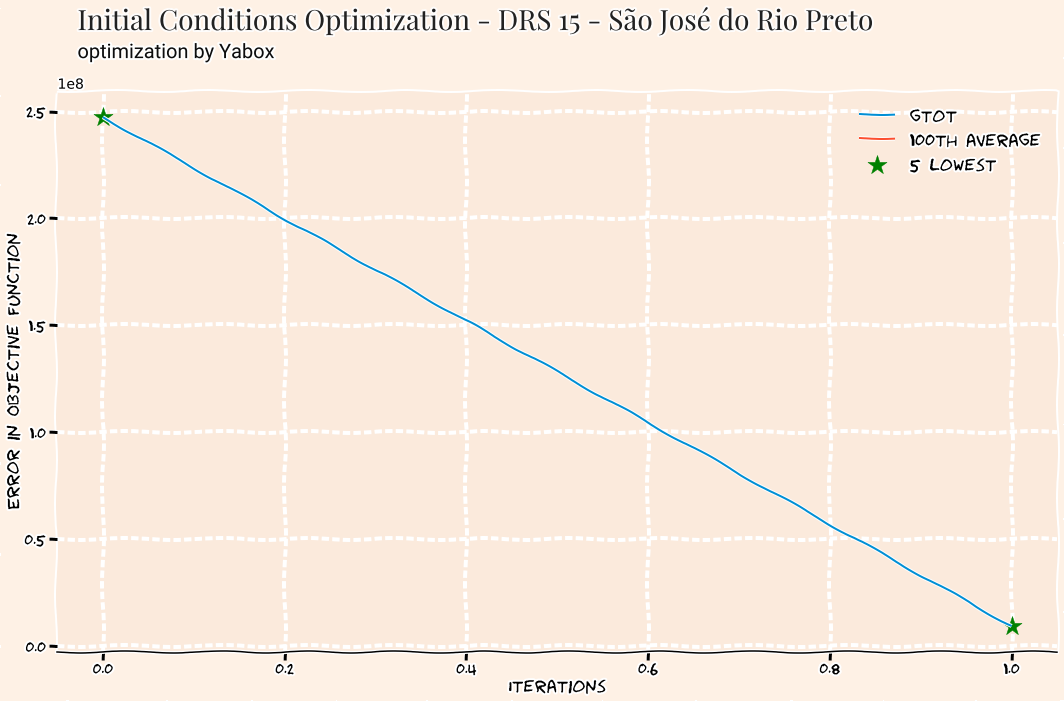

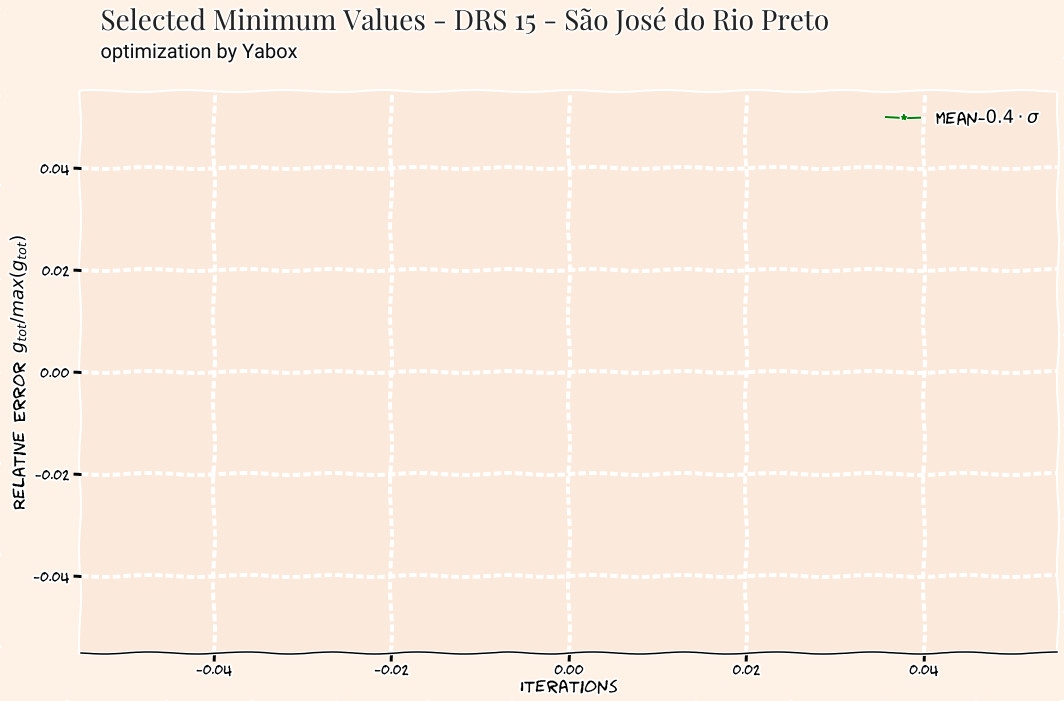

# Results for DRS 16 - Sorocaba District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1  7.407088e+06 2020-04-02            0  1622   1   0  0.3089  0.0699

## 5 Lowest Results DRS 16 - Sorocaba District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1  7.407088e+06 2020-04-02            0  1622   1   0  0.3089  0.0699
0  1.664104e+07 2020-03-31            0   978   1   0  0.5141  0.0661

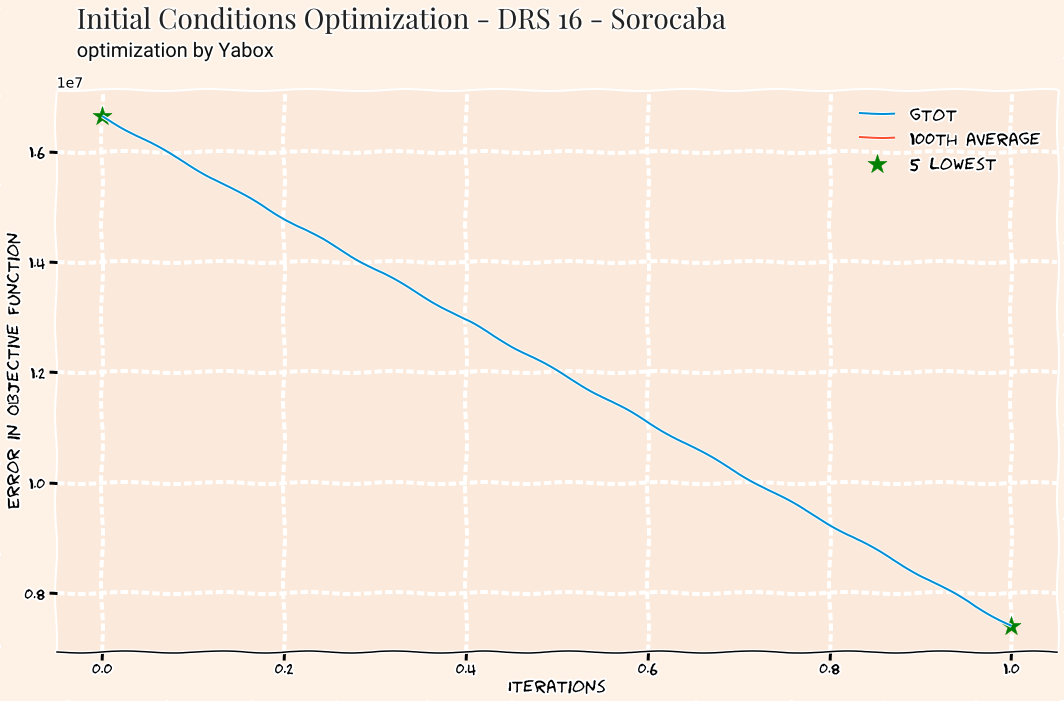

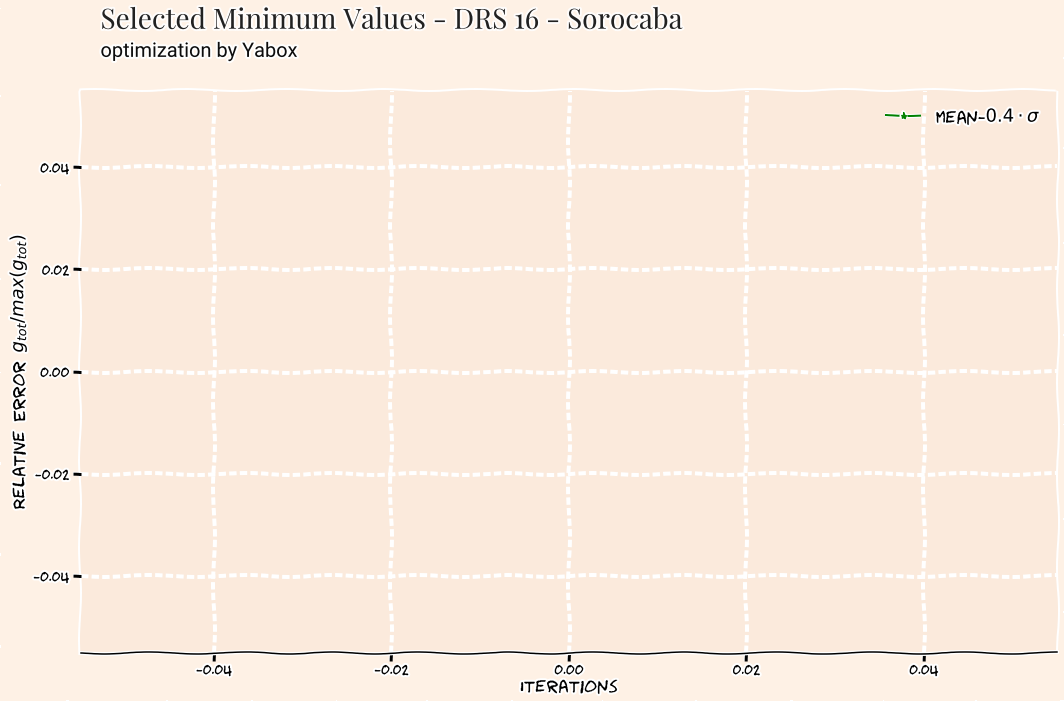

# Results for DRS 17 - Taubaté District Region

gtot  startdate  startNcases     s0  i0  d0  wcases   wrec
1  1.806873e+08 2020-04-02            0  13509  14   2  0.3053  0.073

## 5 Lowest Results DRS 17 - Taubaté District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
1  1.806873e+08 2020-04-02            0  13509  14   2  0.3053  0.0730
0  2.692773e+08 2020-04-01            0  14871  30   2  0.7793  0.0703

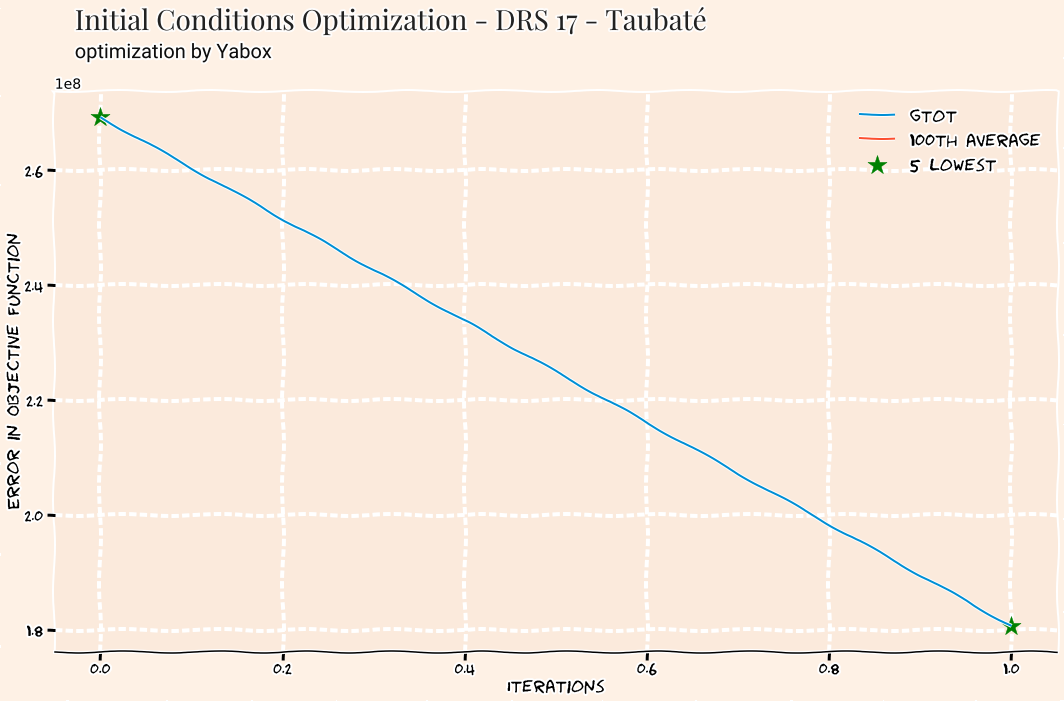

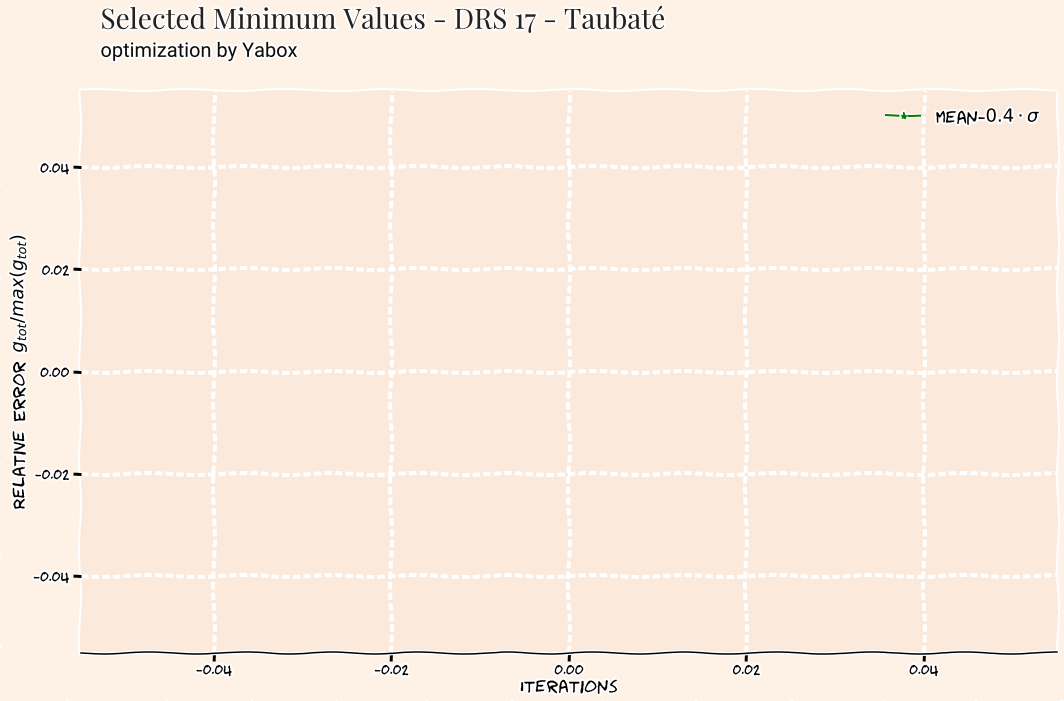

In [32]:
for districtRegion in DRS:
    versionStr=str(version)
    dateparse = lambda x: datetime.strptime(x, ' %Y-%m-%d')
    histOptAll= pd.read_table('./results/history_'+districtRegion+versionStr+'.csv', sep=",", \
                                index_col=0, header=None, parse_dates=[3], date_parser=dateparse,
        names = ["districtRegion","gtot",\
            "s0","startdate","i0","d0","startNcases","wcases","wrec"])
    histOptAll = histOptAll[['gtot', 'startdate','startNcases','s0',"i0","d0","wcases","wrec"]]
        
    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
    histOptAll = histOptAll.reset_index(drop=True)
    
    #format integers and decimal places
    histOptAll['d0'] = histOptAll['d0'].apply(lambda x: int(x+0.5))
    histOptAll['startNcases'] = histOptAll['startNcases'].apply(lambda x: int(x+0.5))
    histOptAll['s0'] = histOptAll['s0'].apply(lambda x: int(x+0.5))
    histOptAll['i0'] = histOptAll['i0'].apply(lambda x: int(x+0.5))
    histOptAll['wcases'] = histOptAll['wcases'].apply(lambda x: round(x,4))
    histOptAll['wrec'] = histOptAll['wrec'].apply(lambda x: round(x,4))
    
    #print optimum parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    display(Markdown("# Results for "+districtRegion+" District Region"))
    display(histOpt.iloc[:,0:8])
    histOpt.to_csv("data/vars_optimized_"+districtRegion+model+"HistMin.csv", sep=",", index=False)
        
    #current parameters
    query = dfparam.query('DRS == "{}"'.format(districtRegion)).reset_index()
    parameters = np.array(query.iloc[:, 2:])[0]
    date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec = parameters
        
    #query parameters
    j = query['index'].values[0]
    
    #define s0, i0 and d0
    dfparam.at[j, "s0"] = histOpt.s0
    dfparam['s0'] = dfparam['s0'].apply(lambda x: int(x+0.5))
    dfparam.at[j, "i0"] = histOpt.i0
    dfparam['i0'] = dfparam['i0'].apply(lambda x: int(x+0.5))
    dfparam.at[j, "d0"] = histOpt.d0
    dfparam.at[j, "START"] = histOpt.startNcases

    dfparam['d0'] = dfparam['d0'].apply(lambda x: int(x+0.5))
    
    #define Start N Cases
    dfparam['START'] = dfparam['START'].apply(lambda x: int(x+0.5))
    
    #define date, wcases, wrec
    dfparam.at[j, "start-date"] = histOpt.startdate.dt.strftime('%Y-%m-%d').values[0]
    dfparam.at[j, "WCASES"] = histOpt.wcases
    dfparam.at[j, "WREC"] = histOpt.wrec
    
    #save new parameters
    dfparam.to_csv("data/param_optimized_"+model+"_HistMin.csv", sep=",", index=False)
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Error in Objective Function", fontproperties=comic_font)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        #PLOTTING itself
        x=histOptAll.index
        y=histOptAll.gtot
        ax.plot(x,y, label="gtot")
        display(Markdown("## 5 Lowest Results "+districtRegion+" District Region"))
        histMin=histOptAll.nsmallest(5, ['gtot']).sort_values('gtot').iloc[:,0:8]
        display(histMin)

        ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='green',marker='*',s=400)
        histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Initial Conditions Optimization - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/convergence_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()
        
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        size=len(histOptAll)
        histMin=histOptAll.nsmallest(int(size*0.25+0.5), ['gtot']).sort_values('gtot').iloc[:,0:8]
        histMin.sort_index(inplace=True)
        
        histMin['error']=histMin.gtot/histMin.gtot.max()
        x=histMin.index[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        y=histMin.error[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        ax.plot(x, y, label="mean-$0.4 \cdot \sigma$",c='green',marker='*')
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Relative Error $g_{tot}/max(g_{tot})$", fontproperties=comic_font)

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Selected Minimum Values - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/minimumPoints_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()

In [33]:
display(Markdown("# Final Results for Initial Conditions"))
display(Markdown("## "+model+" optimization model"))

display(dfparam)

# Final Results for Initial Conditions

## Yabox optimization model

DRS  start-date  prediction-range       s0  \
0        DRS 01 - Grande São Paulo  2020-03-21               200  2038281   
1               DRS 02 - Araçatuba  2020-04-02               150      561   
2              DRS 03 - Araraquara  2020-03-30               150     1706   
3        DRS 04 - Baixada Santista  2020-03-31               150    10688   
4                DRS 05 - Barretos  2020-04-02               150     2849   
5                   DRS 06 - Bauru  2020-03-30               150    10620   
6                DRS 07 - Campinas  2020-03-30               150    17875   
7                  DRS 08 - Franca  2020-04-01               150      900   
8                 DRS 09 - Marília  2020-04-01               150     4006   
9              DRS 10 - Piracicaba  2020-03-31               150    10170   
10    DRS 11 - Presidente Prudente  2020-04-01               150      939   
11               DRS 12 - Registro  2020-04-02               150     1442   
12         DRS 13 - Ribeirão Preto  2020-03-30               150     6253   
13  DRS 14 - São João da Boa Vista  2020-04-02               150     2443   
14  DRS 15 - São José do Rio Preto  2020-03-30               150    12276   
15               DRS 16 - Sorocaba  2020-04-02               150     1622   
16                DRS 17 - Taubaté  2020-04-02               150    13509   

        e0      a0    i0        r0   d0  START  RATIO  WCASES    WREC  
0   0.0001  0.0001  1537  300.0000  130      0   0.15  0.3288  0.0587  
1   0.0001  0.0001     0    0.0001    0      0   0.10  0.6556  0.0725  
2   0.0001  0.0001     0    0.0001    0      0   0.10  0.6385  0.0469  
3   0.0001  0.0001     0    0.0001    0      0   0.10  0.3648  0.0209  
4   0.0001  0.0001     0    0.0001    0      0   0.10  0.4048  0.0513  
5   0.0001  0.0001     3    0.0001    0      0   0.10  0.7104  0.0654  
6   0.0001  0.0001    40    0.0001    0      0   0.10  0.4898  0.0372  
7   0.0001  0.0001     0    0.0001    0      0   0.10  0.4555  0.0441  
8   0.0001  0.0001     0    0.0001    0      0   0.10  0.7369  0.0472  
9   0.0001  0.0001     0    0.0001    0      0   0.10  0.3985  0.0570  
10  0.0001  0.0001     0    0.0001    0      0   0.10  0.3094  0.0258  
11  0.0001  0.0001     0    0.0001    0      0   0.10  0.4552  0.0260  
12  0.0001  0.0001     0    0.0001    0      4   0.10  0.7525  0.0227  
13  0.0001  0.0001     0    0.0001    0      0   0.10  0.6303  0.0607  
14  0.0001  0.0001     0    0.0001    0      0   0.10  0.4105  0.0251  
15  0.0001  0.0001     1    0.0001    0      0   0.10  0.3089  0.0699  
16  0.0001  0.0001    14    0.0001    2      0   0.10  0.3053  0.0730